In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#Read csv file
df_train=pd.read_csv('findata_challenge_train.csv')
df_test=pd.read_csv('findata_challenge_test.csv')

#Read the data
print(df_train.shape)
df_train.head()

(100000, 126)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x116,x117,x118,x119,x120,x121,x122,x123,x124,y
0,0.067563,-2.172492,-1.713774,-0.146854,-0.685219,-0.933838,4.0,2.0,-4.476051,-1.472306,...,4.607926,52.0,1.0,0.773809,0.766531,6.307142,9.074515,-2.694049,0.330964,0
1,0.099622,0.584803,-6.089758,-0.252186,-0.334912,-4.671281,4.0,2.0,-0.387076,-0.664552,...,15.889763,53.0,1.0,7.065852,0.994304,-0.028411,-21.472850,5.626095,1.293455,0
2,0.648421,3.881137,0.961359,0.217361,-1.471850,-0.975352,5.0,1.0,-0.850146,-4.011487,...,13.770410,53.0,1.0,-8.598553,-2.958302,-12.784030,-36.855873,0.356093,1.499790,0
3,0.005775,-2.726153,2.891378,-0.038325,2.280847,1.761478,3.0,3.0,9.116188,-4.610151,...,5.904901,50.0,1.0,8.194975,-7.798308,10.910515,15.226094,-10.440813,-0.735116,0
4,0.044396,2.803576,-1.923381,-0.116657,-1.574199,6.098627,3.0,1.0,-13.956141,13.785099,...,-14.603703,47.0,0.0,2.330789,-8.249825,-12.680490,40.192302,-5.037065,1.679262,1


In [66]:
#Check for Null values
df_train.isna().sum().sort_values(ascending=False)

x45     159
x70     159
x14     156
x72     149
x110    148
       ... 
x62     108
x113    104
x81     101
x114    100
y         0
Length: 126, dtype: int64

In [67]:
import missingno as msno

<AxesSubplot:>

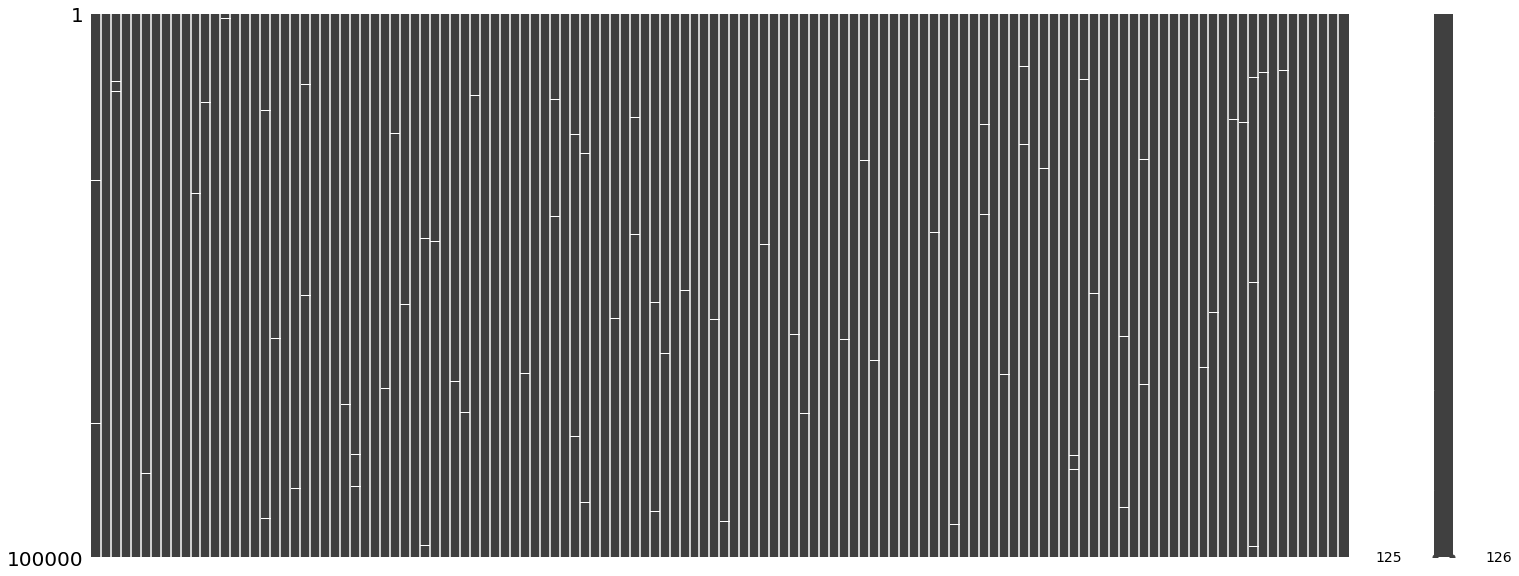

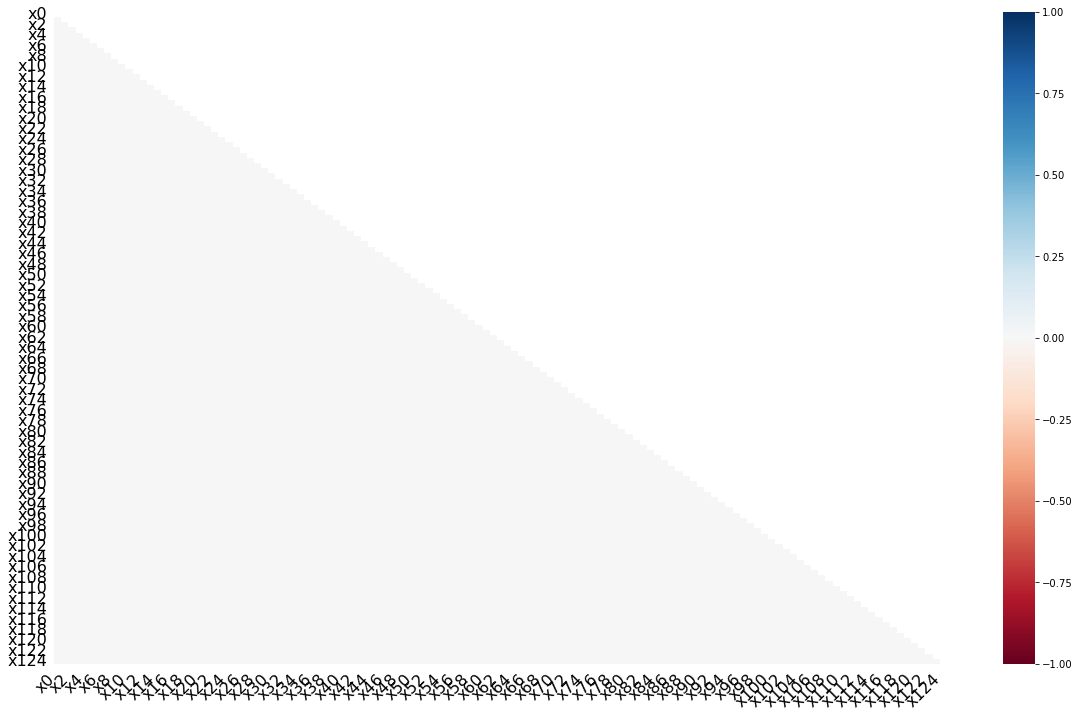

In [68]:
msno.matrix(df_train)
msno.heatmap(df_train)

In [69]:
df_train=df_train.dropna().reset_index(drop=True)
df_test=df_test.dropna().reset_index(drop=True)

In [70]:
df_train.dtypes

x0      float64
x1      float64
x2      float64
x3      float64
x4      float64
         ...   
x121    float64
x122    float64
x123    float64
x124    float64
y         int64
Length: 126, dtype: object

In [71]:
object_df=df_train.loc[:,df_train.dtypes=='object']
df_train=df_train.drop(object_df.columns,axis=1)
object_df=pd.concat([object_df,df_train['y']],axis=1)
object_df

,x21,x79,x89,x108,x112,y
0,Jun,Laki-laki,Jambi,SMP,May,0
1,Jul,Perempuan,Sumatera Selatan,SD,Jun,0
2,Jun,Laki-laki,Kalimantan Utara,SMP,Sep,0
3,Jul,Laki-laki,Kalimantan Utara,SMA/SMK,Jun,1
4,Jul,Perempuan,Jambi,SMP,Jul,0
...,...,...,...,...,...,...
83971,May,Perempuan,Gorontalo,SMP,Aug,0
83972,Jun,Perempuan,Gorontalo,SMP,Apr,0
83973,Jul,Laki-laki,Kalimantan Selatan,SMP,Jun,0
83974,Mar,Laki-laki,Kalimantan Timur,SMP,May,1


In [72]:
from sklearn.manifold import TSNE
m = TSNE(learning_rate=50)
tsne_features = m.fit_transform(df_train)
print(tsne_features.shape)

(83976, 2)


In [79]:
new_df=pd.DataFrame(tsne_features,columns=['x1','x2'])
new_df['y']=df_train['y']
new_df

,x1,x2,y
0,21.159592,-7.295049,0
1,-11.586665,3.804461,0
2,-1.230638,-8.530681,0
3,-3.738949,-19.102007,1
4,17.181465,-13.079805,0
...,...,...,...
83971,-7.135311,10.842307,0
83972,14.431350,-1.782553,0
83973,-2.353382,-12.670823,0
83974,-10.225542,2.776831,1


In [9]:
corr_to_target=abs(df_train.corr()['y'])
df_train=df_train.drop(corr_to_target[corr_to_target<0.1].index,axis=1)
df_train

,x17,x21,x41,x57,x60,x79,x89,x106,x108,x112,y
0,-7.196990,Jun,21.860965,-0.395665,-23.431641,Laki-laki,Jambi,2.769484,SMP,May,0
1,22.014273,Jul,6.898550,-1.473236,-2.325219,Perempuan,Sumatera Selatan,-4.319801,SD,Jun,0
2,-101.254484,Jun,14.613527,5.478409,6.255019,Laki-laki,Kalimantan Utara,-5.822965,SMP,Sep,0
3,-38.689924,Jul,-16.016833,5.247766,1.628471,Laki-laki,Kalimantan Utara,1.320522,SMA/SMK,Jun,1
4,16.316127,Jul,-11.123732,-5.402262,-10.074757,Perempuan,Jambi,9.897958,SMP,Jul,0
...,...,...,...,...,...,...,...,...,...,...,...
83971,-38.899896,May,14.151123,1.548104,9.954111,Perempuan,Gorontalo,4.372397,SMP,Aug,0
83972,18.218349,Jun,27.898981,-0.222643,2.722408,Perempuan,Gorontalo,2.908509,SMP,Apr,0
83973,-19.381798,Jul,-7.870479,8.050937,1.083647,Laki-laki,Kalimantan Selatan,-1.886619,SMP,Jun,0
83974,-39.646335,Mar,5.861876,0.722950,12.310194,Laki-laki,Kalimantan Timur,3.466702,SMP,May,1


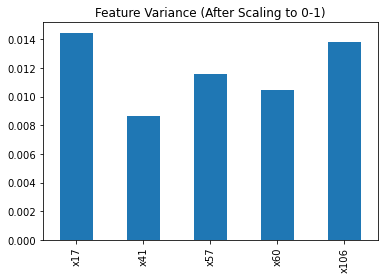

In [10]:
from sklearn.preprocessing import MinMaxScaler
def variance(df):
    mms=MinMaxScaler()
    summary_statistics=pd.DataFrame(mms.fit_transform(df), columns=df.columns).describe()
    return summary_statistics.loc['std']**2

variance=variance(df_train.drop(['x21','x79','x89', 'x108','x112'],axis=1))
variance.drop('y').plot(kind='bar')
plt.title('Feature Variance (After Scaling to 0-1)')
plt.show()

## Exploratory Data Analysis

### Check for Outliers

In [11]:
df_train.describe()

,x17,x41,x57,x60,x106,y
count,83976.000000,83976.000000,83976.000000,83976.000000,83976.000000,83976.000000
mean,-20.694365,11.213102,1.096445,3.070579,-2.373352,0.170096
std,35.768913,30.091024,4.178299,17.172457,9.907521,0.375720
min,-156.571558,-158.338333,-20.331364,-86.436300,-45.443973,0.000000
25%,-45.005312,-7.918293,-1.647588,-8.300525,-9.050539,0.000000
50%,-21.075126,10.360260,1.133146,3.041661,-2.409060,0.000000
75%,3.205080,29.497153,3.892232,14.413380,4.360593,0.000000
max,140.870974,165.212349,18.543002,81.232130,38.897270,1.000000


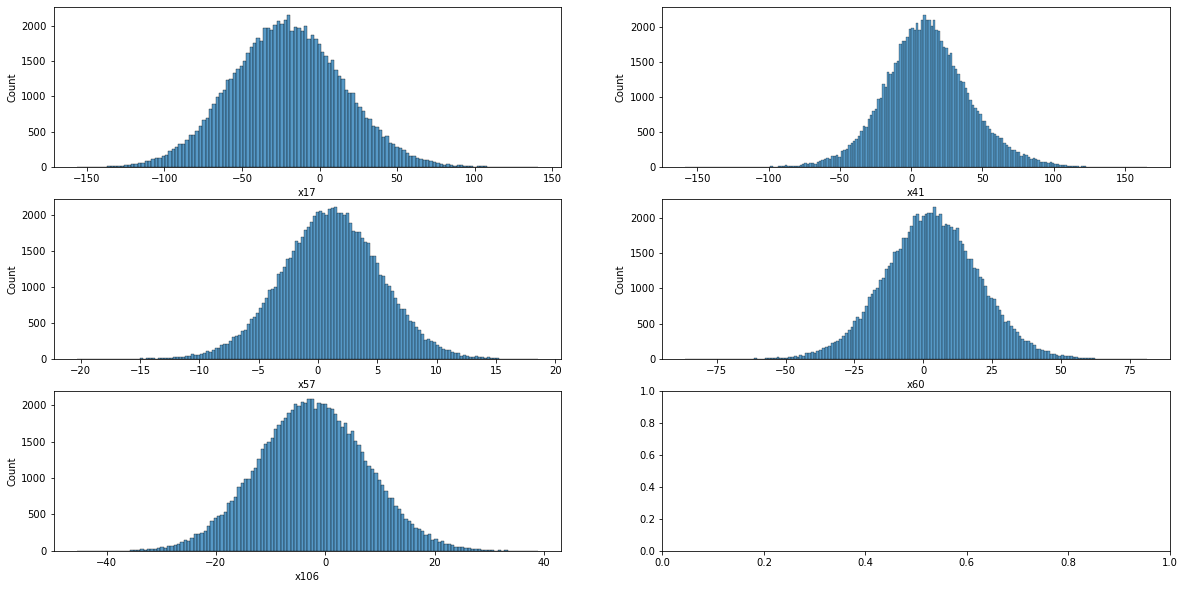

In [12]:
fig,ax=plt.subplots(ncols=2,nrows=3,figsize=(20,10))
sns.histplot(df_train['x17'],ax=ax[0,0])
sns.histplot(df_train['x41'],ax=ax[0,1])
sns.histplot(df_train['x57'],ax=ax[1,0])
sns.histplot(df_train['x60'],ax=ax[1,1])
sns.histplot(df_train['x106'],ax=ax[2,0])
plt.show()

In [13]:
def outliers(df,col):
    q1,q3=np.quantile(df[col],[0.25,0.75])
    iqr=q3-q1
    lower_outlier=q1-2*iqr
    upper_outlier=q3+2*iqr
    return lower_outlier,upper_outlier
lower1,upper1=outliers(df_train,'x17')
lower2,upper2=outliers(df_train,'x41')
lower3,upper3=outliers(df_train,'x57')
lower4,upper4=outliers(df_train,'x60')
lower5,upper5=outliers(df_train,'x106')

df_train['x17']=[x if x<upper1 else upper1 for x in df_train['x17']]
df_train['x17']=[x if x>lower1 else lower1 for x in df_train['x17']]
df_train['x41']=[x if x<upper2 else upper2 for x in df_train['x41']]
df_train['x41']=[x if x>lower2 else lower2 for x in df_train['x41']]
df_train['x57']=[x if x<upper3 else upper3 for x in df_train['x57']]
df_train['x57']=[x if x>lower3 else lower3 for x in df_train['x57']]
df_train['x60']=[x if x<upper4 else upper4 for x in df_train['x60']]
df_train['x60']=[x if x>lower4 else lower4 for x in df_train['x60']]
df_train['x106']=[x if x<upper5 else upper5 for x in df_train['x106']]
df_train['x106']=[x if x>lower5 else lower5 for x in df_train['x106']]

df_test['x17']=[x if x<upper1 else upper1 for x in df_test['x17']]
df_test['x17']=[x if x>lower1 else lower1 for x in df_test['x17']]
df_test['x41']=[x if x<upper2 else upper2 for x in df_test['x41']]
df_test['x41']=[x if x>lower2 else lower2 for x in df_test['x41']]
df_test['x57']=[x if x<upper3 else upper3 for x in df_test['x57']]
df_test['x57']=[x if x>lower3 else lower3 for x in df_test['x57']]
df_test['x60']=[x if x<upper4 else upper4 for x in df_test['x60']]
df_test['x60']=[x if x>lower4 else lower4 for x in df_test['x60']]
df_test['x106']=[x if x<upper5 else upper5 for x in df_test['x106']]
df_test['x106']=[x if x>lower5 else lower5 for x in df_test['x106']]

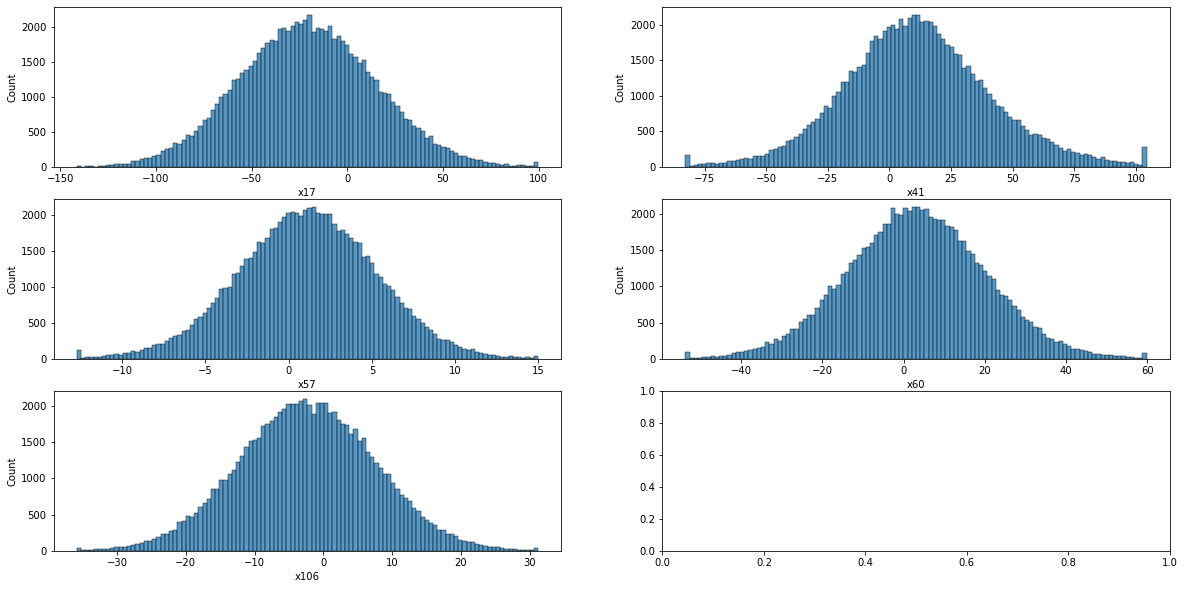

In [14]:
fig,ax=plt.subplots(ncols=2,nrows=3,figsize=(20,10))
sns.histplot(df_train['x17'],ax=ax[0,0])
sns.histplot(df_train['x41'],ax=ax[0,1])
sns.histplot(df_train['x57'],ax=ax[1,0])
sns.histplot(df_train['x60'],ax=ax[1,1])
sns.histplot(df_train['x106'],ax=ax[2,0])
plt.show()

### Visual EDA

**Numerical Features**

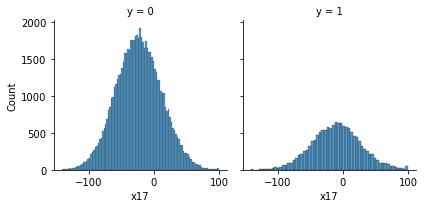

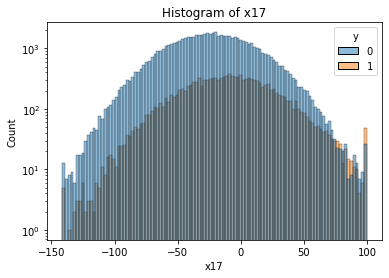

In [37]:
g=sns.FacetGrid(df_train,col='y')
g.map(sns.histplot,'x17')
plt.show()
sns.histplot(x='x17',data=df_train,hue='y')
plt.title('Histogram of x17')
plt.yscale('log')
plt.show()

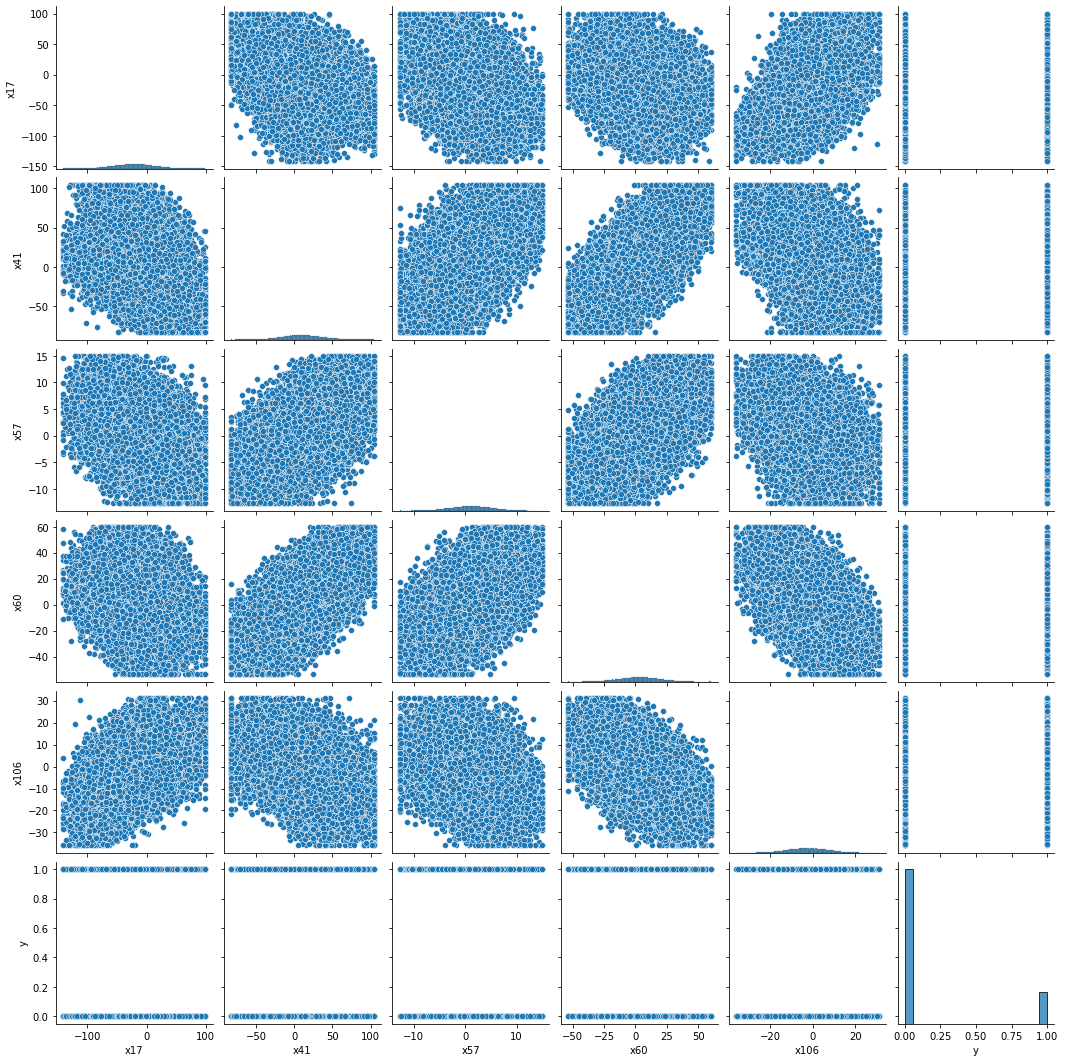

In [38]:
sns.pairplot(df_train)

In [51]:
df_train['x17106']=df_train['x17']+df_train['x106']
df_train['kurang']=df_train['x41']+df_train['x57']+df_train['x60']
df_train.corr()

,x17,x41,x57,x60,x106,y,x17106,kurang
x17,1.000000,-0.279487,-0.368262,-0.276822,0.584856,0.138293,0.981810,-0.324521
x41,-0.279487,1.000000,0.484689,0.624259,-0.494955,-0.120364,-0.351997,0.944988
x57,-0.368262,0.484689,1.000000,0.478176,-0.338341,-0.127748,-0.390346,0.595470
x60,-0.276822,0.624259,0.478176,1.000000,-0.533762,-0.115250,-0.358829,0.838061
x106,0.584856,-0.494955,-0.338341,-0.533762,1.000000,0.115914,0.728225,-0.562242
y,0.138293,-0.120364,-0.127748,-0.115250,0.115914,1.000000,0.143978,-0.135400
x17106,0.981810,-0.351997,-0.390346,-0.358829,0.728225,0.143978,1.000000,-0.405798
kurang,-0.324521,0.944988,0.595470,0.838061,-0.562242,-0.135400,-0.405798,1.000000


<AxesSubplot:xlabel='x17106', ylabel='x17'>

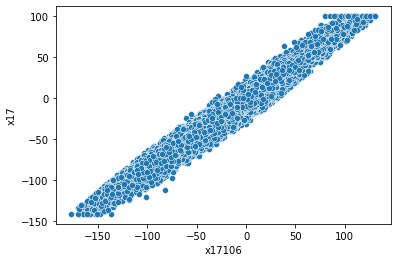

In [52]:
sns.scatterplot(x='x17106',y='x17',data=df_train)

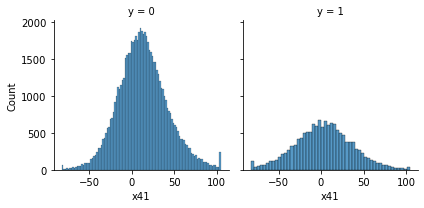

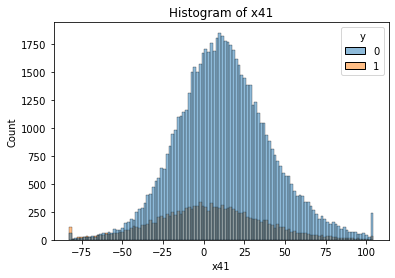

In [16]:
g=sns.FacetGrid(df_train,col='y')
g.map(sns.histplot,'x41')
plt.show()
sns.histplot(x='x41',data=df_train,hue='y')
plt.title('Histogram of x41')
plt.show()

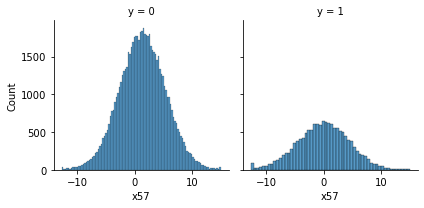

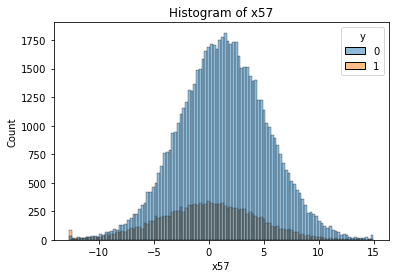

In [17]:
g=sns.FacetGrid(df_train,col='y')
g.map(sns.histplot,'x57')
plt.show()
sns.histplot(x='x57',data=df_train,hue='y')
plt.title('Histogram of x57')
plt.show()

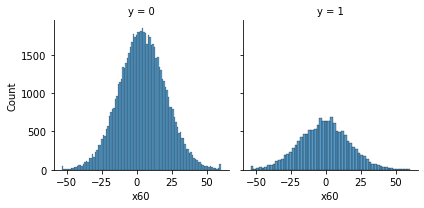

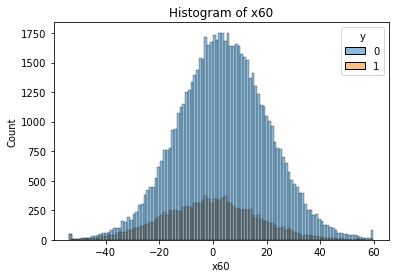

In [31]:
g=sns.FacetGrid(df_train,col='y')
g.map(sns.histplot,'x60')
plt.show()
sns.histplot(x='x60',data=df_train,hue='y')
plt.title('Histogram of x60')
plt.show()

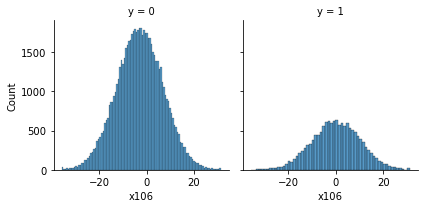

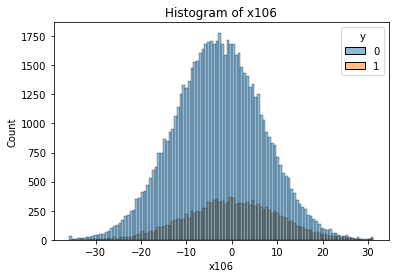

In [19]:
g=sns.FacetGrid(df_train,col='y')
g.map(sns.histplot,'x106')
plt.show()
sns.histplot(x='x106',data=df_train,hue='y')
plt.title('Histogram of x106')
plt.show()

**Categorical Features**

In [20]:
object_df.head()

,x21,x79,x89,x108,x112,y
0,Jun,Laki-laki,Jambi,SMP,May,0
1,Jul,Perempuan,Sumatera Selatan,SD,Jun,0
2,Jun,Laki-laki,Kalimantan Utara,SMP,Sep,0
3,Jul,Laki-laki,Kalimantan Utara,SMA/SMK,Jun,1
4,Jul,Perempuan,Jambi,SMP,Jul,0


In [21]:
q1=['Jan','Feb','Mar']
q2=['Apr','May','Jun']
q3=['Jul','Aug','Sep']
q4=['Oct','Nov','Dec']
df_train['x21']=df_train['x21'].replace(q1,'q1')
df_train['x21']=df_train['x21'].replace(q2,'q2')
df_train['x21']=df_train['x21'].replace(q3,'q3')
df_train['x21']=df_train['x21'].replace(q4,'q4')

df_train['x112']=df_train['x112'].replace(q1,'q1')
df_train['x112']=df_train['x112'].replace(q2,'q2')
df_train['x112']=df_train['x112'].replace(q3,'q3')
df_train['x112']=df_train['x112'].replace(q4,'q4')
df_train['x112']

0        q2
1        q2
2        q3
3        q2
4        q3
         ..
83971    q3
83972    q2
83973    q2
83974    q2
83975    q3
Name: x112, Length: 83976, dtype: object

y,0,1,woe,iv
x21,,,,
q1,0.015195,0.027023,0.575703,0.019135
q2,0.531309,0.575959,0.080693,0.019135
q3,0.438530,0.387426,-0.123901,0.019135
q4,0.014966,0.009591,-0.444930,0.019135


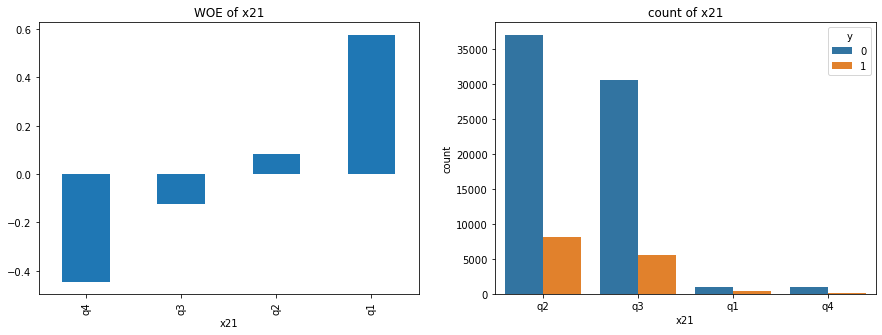

In [22]:
feature,target = 'x21','y'
df_woe_iv = (pd.crosstab(df_train[feature],df_train[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
display(df_woe_iv)

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
df_woe_iv['woe'].sort_values().plot(kind='bar',ax=ax[0])
ax[0].set_title('WOE of x21')
sns.countplot(x='x21',data=df_train,hue='y',ax=ax[1])
ax[1].set_title('count of x21')
plt.show()

y,0,1,woe,iv
x79,,,,
Laki-laki,0.498737,0.504901,0.012282,0.000152
Perempuan,0.501263,0.495099,-0.012372,0.000152


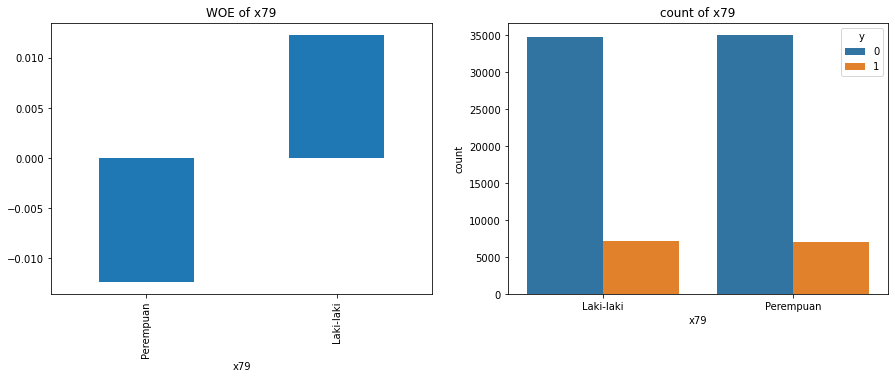

In [23]:
feature,target = 'x79','y'
df_woe_iv = (pd.crosstab(df_train[feature],df_train[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
display(df_woe_iv)

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
df_woe_iv['woe'].sort_values().plot(kind='bar',ax=ax[0])
ax[0].set_title('WOE of x79')
sns.countplot(x='x79',data=df_train,hue='y',ax=ax[1])
ax[1].set_title('count of x79')
plt.show()

y,0,1,woe,iv
x108,,,,
S1/S2/S3,0.007849,0.007841,-0.001004,0.000038
SD,0.152629,0.152408,-0.001445,0.000038
SMA/SMK,0.233312,0.234108,0.003405,0.000038
SMP,0.603111,0.602212,-0.001491,0.000038
Tidak sekolah,0.003099,0.003430,0.101487,0.000038


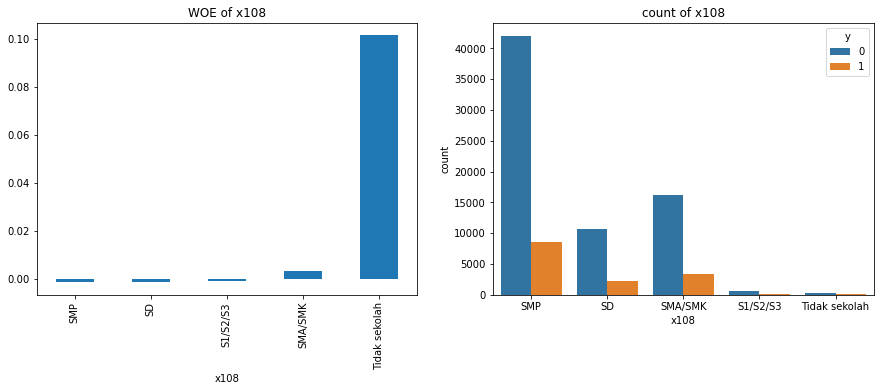

In [24]:
feature,target = 'x108','y'
df_woe_iv = (pd.crosstab(df_train[feature],df_train[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
display(df_woe_iv)

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
df_woe_iv['woe'].sort_values().plot(kind='bar',ax=ax[0])
ax[0].set_title('WOE of x108')
sns.countplot(x='x108',data=df_train,hue='y',ax=ax[1])
ax[1].set_title('count of x108')
plt.show()

y,0,1,woe,iv
x112,,,,
q1,0.011077,0.011271,0.017365,0.000117
q2,0.451989,0.446654,-0.011874,0.000117
q3,0.518969,0.524083,0.009805,0.000117
q4,0.017965,0.017992,0.001524,0.000117


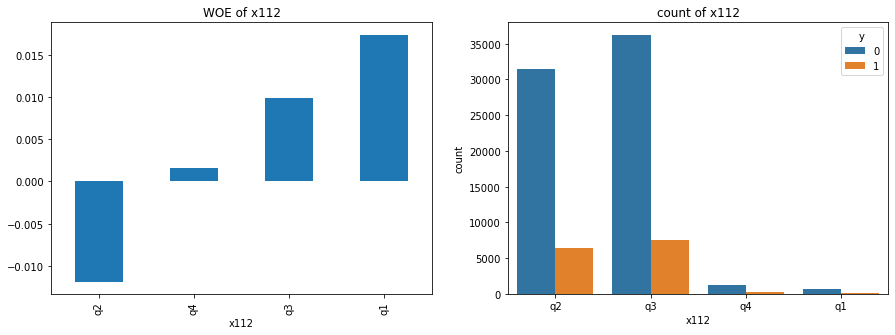

In [25]:
feature,target = 'x112','y'
df_woe_iv = (pd.crosstab(df_train[feature],df_train[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
display(df_woe_iv)

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
df_woe_iv['woe'].sort_values().plot(kind='bar',ax=ax[0])
ax[0].set_title('WOE of x112')
sns.countplot(x='x112',data=df_train,hue='y',ax=ax[1])
ax[1].set_title('count of x112')
plt.show()

In [26]:
feature2,target = 'x108','y'
df_woe_iv2 = (pd.crosstab(df_train[feature2],df_train[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
df_woe_iv2

y,0,1,woe,iv
x108,,,,
S1/S2/S3,0.007849,0.007841,-0.001004,0.000038
SD,0.152629,0.152408,-0.001445,0.000038
SMA/SMK,0.233312,0.234108,0.003405,0.000038
SMP,0.603111,0.602212,-0.001491,0.000038
Tidak sekolah,0.003099,0.003430,0.101487,0.000038


In [55]:
df_train=df_train.drop(df_train.loc[:,df_train.dtypes=='object'].columns,axis=1)

In [28]:
df_train.describe()

,x17,x41,x57,x60,x106,y
count,83976.000000,83976.000000,83976.000000,83976.000000,83976.000000,83976.000000
mean,-20.701829,11.206802,1.097923,3.070878,-2.373045,0.170096
std,35.735303,29.905568,4.169322,17.141070,9.900099,0.375720
min,-141.426096,-82.749184,-12.727230,-53.728336,-35.872802,0.000000
25%,-45.005312,-7.918293,-1.647588,-8.300525,-9.050539,0.000000
50%,-21.075126,10.360260,1.133146,3.041661,-2.409060,0.000000
75%,3.205080,29.497153,3.892232,14.413380,4.360593,0.000000
max,99.625864,104.328044,14.971874,59.841191,31.182856,1.000000


In [60]:
df_train

,x17,x41,x57,x60,x106,y,x17106,kurang
0,-7.196990,21.860965,-0.395665,-23.431641,2.769484,0,-4.427506,-1.966341
1,22.014273,6.898550,-1.473236,-2.325219,-4.319801,0,17.694473,3.100095
2,-101.254484,14.613527,5.478409,6.255019,-5.822965,0,-107.077450,26.346955
3,-38.689924,-16.016833,5.247766,1.628471,1.320522,1,-37.369402,-9.140595
4,16.316127,-11.123732,-5.402262,-10.074757,9.897958,0,26.214085,-26.600751
...,...,...,...,...,...,...,...,...
83971,-38.899896,14.151123,1.548104,9.954111,4.372397,0,-34.527499,25.653337
83972,18.218349,27.898981,-0.222643,2.722408,2.908509,0,21.126857,30.398746
83973,-19.381798,-7.870479,8.050937,1.083647,-1.886619,0,-21.268418,1.264105
83974,-39.646335,5.861876,0.722950,12.310194,3.466702,1,-36.179633,18.895020


In [80]:
from sklearn.model_selection import train_test_split

X=new_df.drop('y',axis=1)
y=new_df[['y']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [82]:
from sklearn.model_selection import train_test_split

X=df_train.drop('y',axis=1)
y=df_train[['y']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [83]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve
from sklearn.model_selection import cross_val_score,GridSearchCV


#Menginisiasi Model
model_12xgb = xgb.XGBClassifier(objective ='binary:logistic', n_estimators = 100,
                                use_label_encoder=False,learning_rate=0.05,
                                base_score=0.5,max_depth=6,eval_metric='mlogloss')


model_12xgb.fit(X_train,y_train)

#Melakukan Prediksi
proba12xgb=model_12xgb.predict_proba(X_test)[:,1]
pred12xgb=model_12xgb.predict(X_test)

#Evaluasi Model
TN12, FP12, FN12, TP12 = confusion_matrix(y_test,pred12xgb).ravel()


def cm_score(tn,fp,fn,tp):
    tpr=tp/(tp+fn)
    tnr=tn/(tn+fp)
    ppv=tp/(tp+fp)
    npv=tn/(tn+fn)
    fpr=fp/(fp+tn)
    fnr=fn/(tp+fn)
    fdr=fp/(tp+fp)
    return tpr,tnr,ppv,npv,fpr,fnr,fdr

TPR,TNR,PPV,NPV,FPR,FNR,FDR=cm_score(TN12, FP12, FN12, TP12)

print('True Negative:',TN12)
print('False Positive:',FP12)
print('False Negative:',FN12)
print('True Positive:',TP12)
print('Recall:',TPR)
print('False Positive Rate:',FPR)
print('Precision:',PPV)
print('True Positive Rate:',TPR)
print('Specificity:',TNR)

auc_score_train12xgb=roc_auc_score(y_train,model_12xgb.predict_proba(X_train)[:,1])
auc_score_test12xgb=roc_auc_score(y_test,proba12xgb)

print('AUC Score training data:',auc_score_train12xgb)
print('AUC Score test data:',auc_score_test12xgb)

cv12=cross_val_score(model_12xgb,X_test,y_test,cv=5)
print('AUC Score Cross-Validation:',cv12.mean())

True Negative: 20743
False Positive: 154
False Negative: 2863
True Positive: 1433
Recall: 0.3335661080074488
False Positive Rate: 0.00736947887256544
Precision: 0.9029615626969124
True Positive Rate: 0.3335661080074488
Specificity: 0.9926305211274346
AUC Score training data: 0.84628901746344
AUC Score test data: 0.755684276894503
AUC Score Cross-Validation: 0.8733378496476984


In [81]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve
from sklearn.model_selection import cross_val_score,GridSearchCV


#Menginisiasi Model
model_12xgb = xgb.XGBClassifier(objective ='binary:logistic', n_estimators = 100,
                                use_label_encoder=False,learning_rate=0.05,
                                base_score=0.5,max_depth=6,eval_metric='mlogloss')


model_12xgb.fit(X_train,y_train)

#Melakukan Prediksi
proba12xgb=model_12xgb.predict_proba(X_test)[:,1]
pred12xgb=model_12xgb.predict(X_test)

#Evaluasi Model
TN12, FP12, FN12, TP12 = confusion_matrix(y_test,pred12xgb).ravel()


def cm_score(tn,fp,fn,tp):
    tpr=tp/(tp+fn)
    tnr=tn/(tn+fp)
    ppv=tp/(tp+fp)
    npv=tn/(tn+fn)
    fpr=fp/(fp+tn)
    fnr=fn/(tp+fn)
    fdr=fp/(tp+fp)
    return tpr,tnr,ppv,npv,fpr,fnr,fdr

TPR,TNR,PPV,NPV,FPR,FNR,FDR=cm_score(TN12, FP12, FN12, TP12)

print('True Negative:',TN12)
print('False Positive:',FP12)
print('False Negative:',FN12)
print('True Positive:',TP12)
print('Recall:',TPR)
print('False Positive Rate:',FPR)
print('Precision:',PPV)
print('True Positive Rate:',TPR)
print('Specificity:',TNR)

auc_score_train12xgb=roc_auc_score(y_train,model_12xgb.predict_proba(X_train)[:,1])
auc_score_test12xgb=roc_auc_score(y_test,proba12xgb)

print('AUC Score training data:',auc_score_train12xgb)
print('AUC Score test data:',auc_score_test12xgb)

cv12=cross_val_score(model_12xgb,X_test,y_test,cv=5)
print('AUC Score Cross-Validation:',cv12.mean())

True Negative: 20627
False Positive: 221
False Negative: 2914
True Positive: 1431
Recall: 0.3293440736478711
False Positive Rate: 0.010600537221795856
Precision: 0.8662227602905569
True Positive Rate: 0.3293440736478711
Specificity: 0.9893994627782041
AUC Score training data: 0.7686863106288133
AUC Score test data: 0.722349410318933
AUC Score Cross-Validation: 0.8743699343611295


In [ ]:
import lightgbm as lgb

lgb12=lgb.LGBMClassifier(objective='binary',n_estimators = 100)
lgb12.fit(X_train,y_train.values.ravel())

#Melakukan Prediksi
proba12lgb=lgb12.predict_proba(X_test)[:,1]
pred12lgb=lgb12.predict(X_test)

#Evaluasi Model
TN12, FP12, FN12, TP12 = confusion_matrix(y_test,pred12lgb).ravel()

TPR,TNR,PPV,NPV,FPR,FNR,FDR=cm_score(TN12, FP12, FN12, TP12)

print('True Negative:',TN12)
print('False Positive:',FP12)
print('False Negative:',FN12)
print('True Positive:',TP12)
print('Recall:',TPR)
print('False Positive Rate:',FPR)
print('Precision:',PPV)
print('True Positive Rate:',TPR)
print('Specificity:',TNR)

auc_score_train12lgb=roc_auc_score(y_train,lgb12.predict_proba(X_train)[:,1])
auc_score_test12lgb=roc_auc_score(y_test,proba12lgb)

print('AUC Score training data:',auc_score_train12lgb)
print('AUC Score test data:',auc_score_test12lgb)

cv12=cross_val_score(lgb12,X_test,y_test.values.ravel(),cv=5)
print('AUC Score Cross-Validation:',cv12.mean())